# Preamble

We import the required packages and libraries at the begining of the code. Apart from NumPy, Pandas, and PyPlot, we import arff, io, and urllib so that we can read the datasets directly from the corresponding url addresses.

In [ ]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
import urllib.request
import io
from google.colab import files

# updating the default font size for the plots
plt.rcParams.update({'font.size': 12})

# Task 1: Acquire, preprocess, and analyze the data

The first task is to acquire the data, analyze it, and clean it. We read the datasets directly from the corresponding url addresses and load them as Pandas objects (dataframes). We use Pandas since it offers fast and flexible data analysis and manipulation tools. After analyzing and cleaning the data, we convert the dataframes to NumPy arrays so that we can impliment ML algorithms.

In order to separate the two datasets, we use letters *h* and *d*, which stand for Hepatitis and Diabetic Retinopathy Debrecen datasets, respectively. The original data is stored as *Data_h* and *Data_d* (with capital D). In order to carry out all the statistical analyses and cleaning without affecting the original datasets, we copy the original data to an intermediate variable named *data*. The final processed and cleaned data is then converted to NumPy arrays and stored as *data_h* and *data_d* (with small d) to be fed to the ML algorithms.

## Reading data

In [ ]:
# reading datasets from the correspondong urls
# h stands for Hepatitis and d stands for Diabetic Retinopathy Debrecen datasets
# the Hepatitis dataset lacks column headings, so we add the names

url_h = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
columns_h = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
             'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'Spiders', 'ASCITES', 'VARICES',
             'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
Data_h = pd.read_csv(url_h, header=None, names=columns_h)

url_d = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"
ftpstream = urllib.request.urlopen(url_d)
Data_d = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
Data_d = pd.DataFrame(Data_d[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data preprocessing and analysis

### 1- Hepatitis dataset

The Hepatitis dataset has 19 features including 13 binary features and 6 numerical features. The first column is associated with the class label. This dataset has some missing values denoted by *?*. We carry out the following tasks to clean and organize the dataset:

*   Dropping columns (features) and/or removing rows (instances) associated with missing values.
*   Changing the values of binary features from 1-2 to 0-1 for easier reference.
*   Moving the first column associated with the class labels to to the end (last column).





In [ ]:
Data_h.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,Spiders,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


The total number of instances is 155. We count the number of missing values in the dataset.

In [ ]:
print('number of instances =', len(Data_h.index))
Data_h[Data_h == '?'].count()

number of instances = 155


Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
Spiders             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

We can see that the column PROTIME has the maximum number of missing values, i.e. 67. Considering the total number of instances, i.e. 155, it is preferable to drop this column (feature) from the dataset. For all the other columns we remove the rows (instances) inclduing any missing values. After removing the missing values, the total number of instances reduces to 112.

Next, we change the types of these cleaned columns from str (string) to an appropriate type (numeric). For convenience, we label the *Class* as 0 and 1 for die and live, respectively. We can do so for all binary features such as *SEX*.

In [ ]:
data = Data_h.copy()

data.drop(columns='PROTIME', inplace=True)
for i in data.columns:
  data = data.loc[(data[i] != '?')].reset_index(drop=True)

data.iloc[:,1:] = data.iloc[:,1:].astype(float, errors = 'raise')

# changing binary values from (1,2) to (0,1).
data['Class'] -= 1
data.iloc[:,2:14] -= 1
data.iloc[:,-1] -= 1

# moving the Class column to the right-hand end.
data = data[list(data.columns.values)[1:] + ['Class']]

print('number of instances after removing missing values =', len(data.index))
data.head()

number of instances after removing missing values = 112


,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,Spiders,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,0.0,1
1,50.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,0.0,1
2,78.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,0.0,1
3,34.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,0.0,1
4,39.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.3,78.0,30.0,4.4,0.0,1


Now, we carry out some basic statistics as follows:

In [ ]:
data.describe()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,Spiders,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,41.196429,0.116071,0.517857,0.803571,0.348214,0.625000,0.830357,0.803571,0.517857,0.821429,0.660714,0.875000,0.875000,1.272321,105.491071,78.616071,3.834821,0.419643,0.830357
std,12.150586,0.321750,0.501927,0.399082,0.478545,0.486299,0.377006,0.399082,0.501927,0.384714,0.475595,0.332205,0.332205,0.886252,53.295707,68.761010,0.576368,0.495718,0.377006
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.700000,72.000000,30.000000,3.500000,0.000000,1.000000
50%,39.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,56.500000,4.000000,0.000000,1.000000
75%,50.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000,133.500000,98.000000,4.200000,1.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.800000,295.000000,420.000000,5.300000,1.000000,1.000000


Calculating mean values of different features grouped by the class labels provides us with some initial insights regarding the dataset. For example, all the cases that died (Class = 0) were male (SEX = 0) since the mean vaule of feature SEX is 0 for the class label 0. And about 14% of the cases that survived (Calss = 1) were females (SEX = 1). Or 45 and 40 are the average ages of cases who died and survided, respectively.

In [ ]:
data.groupby(['Class']).mean()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,Spiders,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
Class,,,,,,,,,,,,,,,,,,
0,45.210526,0.000000,0.473684,0.894737,0.105263,0.368421,0.842105,0.894737,0.368421,0.684211,0.263158,0.526316,0.578947,2.015789,121.473684,80.210526,3.284211,0.842105
1,40.376344,0.139785,0.526882,0.784946,0.397849,0.677419,0.827957,0.784946,0.548387,0.849462,0.741935,0.946237,0.935484,1.120430,102.225806,78.290323,3.947312,0.333333


We plot the class distribution by counting the number of instances labeled as 0 and 1.

Number of classes labeled as 0: 19
Number of classes labeled as 1: 93


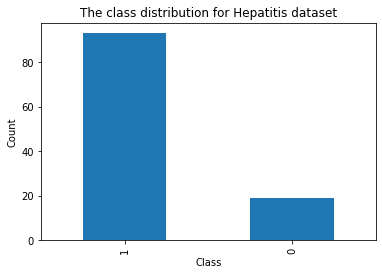

In [ ]:
print('Number of classes labeled as 0:', data['Class'][data['Class'] == 0].count())
print('Number of classes labeled as 1:', data['Class'][~(data['Class'] == 0)].count())

pd.value_counts(data['Class']).plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('The class distribution for Hepatitis dataset')
#plt.savefig('class_dist_h.pdf', format='pdf', bbox_inches='tight')
#files.download('class_dist_h.pdf')
plt.show()

One way to know the importance of different features in a dataset is to compute the cross-correlation matrix. A feature is considered important if it has a high correlation with the class. The correlation between features and the class are denoted as values between 1 and -1 in the cross-correlation matrix.

The feature ASCITES has the highest correlation (about 0.48) with the class. Next is ALBUMIN with a correlation of about 0.43. The feature SEX has a low correlation of about 0.16.

In [ ]:
data.corr()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,Spiders,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
AGE,1.000000,-0.121105,-0.009444,-0.025413,-0.207091,-0.025538,0.188274,-0.079292,-0.093644,-0.007847,-0.125554,-0.040732,-0.013949,0.139721,-0.043096,-0.046631,-0.163845,0.188111,-0.149994
SEX,-0.121105,1.000000,-0.040843,-0.101483,-0.030823,-0.007197,-0.059018,-0.101483,-0.096628,-0.049387,-0.093567,0.136964,0.052678,-0.080254,0.047607,-0.000411,0.041163,-0.138688,0.163791
STEROID,-0.009444,-0.040843,1.000000,0.062644,0.067647,0.212227,0.087567,0.242546,0.106003,-0.029993,0.025609,0.013507,-0.094551,-0.044447,-0.007908,0.058019,0.183122,-0.084700,0.039958
ANTIVIRALS,-0.025413,-0.101483,0.062644,1.000000,-0.016005,0.034816,0.016039,0.038384,0.062644,-0.171843,-0.164434,-0.186871,-0.186871,0.200999,0.193487,0.102940,-0.201078,0.192726,-0.103717
FATIGUE,-0.207091,-0.030823,0.067647,-0.016005,1.000000,0.566170,0.330374,0.125513,0.292689,0.145056,0.365443,0.276262,0.162924,-0.327564,-0.130397,-0.218763,0.298603,-0.165810,0.230504
MALAISE,-0.025538,-0.007197,0.212227,0.034816,0.566170,1.000000,0.583525,0.081236,0.175318,-0.024077,0.379788,0.320653,0.153356,-0.268870,-0.206953,-0.159531,0.278431,-0.200871,0.239552
ANOREXIA,0.188274,-0.059018,0.087567,0.016039,0.330374,0.583525,1.000000,0.195673,0.182784,0.037712,0.329284,0.116890,0.188822,-0.202922,-0.215966,-0.112353,0.081328,-0.097702,-0.014148
LIVER BIG,-0.079292,-0.101483,0.242546,0.038384,0.125513,0.081236,0.195673,1.000000,0.422447,0.121548,0.167824,-0.118918,-0.050965,-0.053718,-0.128001,0.029729,-0.036579,-0.080506,-0.103717
LIVER FIRM,-0.093644,-0.096628,0.106003,0.062644,0.292689,0.175318,0.182784,0.422447,1.000000,0.249938,0.365267,0.067537,0.229625,-0.257099,-0.370619,-0.302467,0.301459,-0.265739,0.135175
SPLEEN PALPABLE,-0.007847,-0.049387,-0.029993,-0.171843,0.145056,-0.024077,0.037712,0.121548,0.249938,1.000000,0.305980,0.105736,0.176227,-0.175807,-0.302816,-0.119087,0.162372,-0.170399,0.161941


We can select features that have the higher correlation with the class label. The features with a correlation higher than 0.3 are shown below. We select consider these features as the important features in this dataset. One can simply change the lower bound on the correlation to select more or less features.

In [ ]:
data.corr()['Class'].loc[abs(data.corr()['Class']) > 0.3]

Spiders      0.379529
ASCITES      0.476550
VARICES      0.404618
BILIRUBIN   -0.380880
ALBUMIN      0.433738
HISTOLOGY   -0.386933
Class        1.000000
Name: Class, dtype: float64

In [ ]:
# we store cleaned data as an array
data_h = data[data.corr()['Class'].loc[abs(data.corr()['Class']) > 0.3].index].to_numpy()

# uncomment to store all of the features
#data_h = data.to_numpy()

### 2- Diabetic Retinopathy Debrecen dataset

The Diabetic Retinopathy Debrecen dataset has 19 features including 3 binary features and 16 numerical features. The last column is associated with the class label. This dataset does not have any missing values.

In [ ]:
data = Data_d.copy()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


As seen, the class column is not properly labeled. We convert this binary object to 0 and 1.

In [ ]:
data['Class'] = data['Class'].astype(int, errors = 'raise')

Now, we carry out some basic statistics as follows:

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


The total number of instances are 1151. We also report the mean values of different features grouped by the class label to attain an initial insight about this dataset. For example, the majority of the first two features are measured as 1 since the mean values are close to 1 for the two class labels. Therefore, we expect these two features have a low correlation with the class.

In [ ]:
data.groupby(['Class']).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Class,,,,,,,,,,,,,,,,,,,
0,0.992593,0.940741,30.457407,30.083333,29.450000,27.862963,25.394444,19.098148,60.489056,23.077008,8.233778,1.401606,0.184963,0.042091,0.007343,0.003486,0.522960,0.109020,0.357407
1,1.000000,0.898527,45.472995,42.942717,40.170213,36.216039,31.710311,22.965630,67.285077,23.097738,9.120730,2.220838,0.892847,0.362711,0.154903,0.067043,0.523435,0.107911,0.317512


We plot the class distribution by counting the number of instances labeled as 0 and 1.

Number of classes labeled as 0: 540
Number of classes labeled as 1: 611


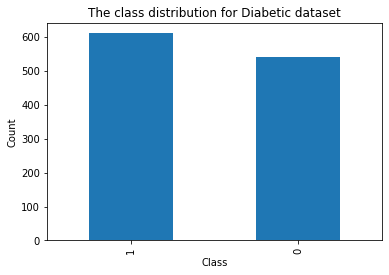

In [ ]:
print('Number of classes labeled as 0:', data['Class'][data['Class'] == 0].count())
print('Number of classes labeled as 1:', data['Class'][~(data['Class'] == 0)].count())
pd.value_counts(data['Class']).plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('The class distribution for Diabetic dataset')
#plt.savefig('class_dist_d.pdf', format='pdf', bbox_inches='tight')
#files.download('class_dist_d.pdf')
plt.show()

Again we use cross-correlation to determine the important features. Feature 2 has the highest correlation with the class (about 0.29). As expected, the first two features weakly correlate with the class (about 0.06 and 0.08, respectively).

In [ ]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.000000,-0.017611,0.035576,0.035929,0.033395,0.036506,0.034817,0.031889,0.063597,0.063061,0.044449,0.027656,0.013336,0.011864,0.012695,0.012289,-0.021943,-0.067325,-0.051723,0.062816
1,-0.017611,1.000000,0.053300,0.054839,0.053056,0.059063,0.060557,0.060152,0.062930,0.052453,0.053534,0.041607,0.015900,0.018950,0.023268,0.023861,0.004751,-0.079577,0.010782,-0.076925
2,0.035576,0.053300,1.000000,0.996177,0.985730,0.963149,0.925274,0.859620,-0.229653,-0.103047,-0.044650,0.103035,0.134464,0.142917,0.196550,0.208422,0.000001,0.033992,-0.344317,0.292603
3,0.035929,0.054839,0.996177,1.000000,0.994221,0.977030,0.944504,0.883511,-0.244704,-0.115253,-0.058364,0.086486,0.117895,0.124198,0.172633,0.185645,0.001953,0.034714,-0.360716,0.266338
4,0.033395,0.053056,0.985730,0.994221,1.000000,0.991821,0.968676,0.916198,-0.283188,-0.139111,-0.086595,0.057769,0.094513,0.098859,0.140774,0.156441,0.000387,0.030396,-0.389384,0.234691
5,0.036506,0.059063,0.963149,0.977030,0.991821,1.000000,0.988294,0.947860,-0.309950,-0.160011,-0.109946,0.029768,0.067477,0.069797,0.102638,0.119405,0.001520,0.016854,-0.411806,0.197511
6,0.034817,0.060557,0.925274,0.944504,0.968676,0.988294,1.000000,0.974577,-0.349811,-0.197279,-0.152578,-0.020469,0.022265,0.024959,0.050579,0.070735,-0.001725,0.010961,-0.437036,0.161631
7,0.031889,0.060152,0.859620,0.883511,0.916198,0.947860,0.974577,1.000000,-0.375506,-0.223681,-0.181197,-0.058153,-0.012400,-0.012175,0.006868,0.031520,-0.002557,-0.011607,-0.435127,0.127861
8,0.063597,0.062930,-0.229653,-0.244704,-0.283188,-0.309950,-0.349811,-0.375506,1.000000,0.767091,0.763409,0.486606,0.163915,0.132227,0.114722,0.084682,-0.086155,-0.086474,0.390304,0.058015
9,0.063061,0.052453,-0.103047,-0.115253,-0.139111,-0.160011,-0.197279,-0.223681,0.767091,1.000000,0.919589,0.624537,0.257159,0.216127,0.181431,0.139196,-0.128990,-0.090721,0.291554,0.000479


We select features that have a correlation of more than 0.2 with the class. Regarding the cross-correlation matrix, three features are selected. By reducing the lower bound on the correlation, more features might be selected.

In [ ]:
data.corr()['Class'].loc[abs(data.corr()['Class']) > 0.2]

2        0.292603
3        0.266338
4        0.234691
Class    1.000000
Name: Class, dtype: float64

In [ ]:
# we store cleaned data as an array
data_d = data[data.corr()['Class'].loc[abs(data.corr()['Class']) > 0.2].index].to_numpy()

# uncomment to store all of the features
#data_d = data.to_numpy()

# Task 2: Model implementation

We implement two ML models, i.e. K-Nearest Neighbours (KNN) and Decision Trees (DT), as Python classes. In addition to these model classes, we define three functions that are used for accuracy/loss evaluation and cross-validation. In our case, loss is simply equal to 1 - accuracy. A function is also defined to calculate the confusion matrix.

## K-Nearest Neighbours (KNN)

In [ ]:
# different distance functions defined

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
minkowski3 = lambda x1, x2: np.power(np.sum((np.abs(x1 - x2))**3, axis=-1), 1/3)
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
cosine = lambda x1, x2: 1-np.sum(x1*x2, axis=-1)/np.sqrt(np.sum(x1**2, axis=-1))*np.sqrt(np.sum(x2**2, axis=-1))

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)
        y_prob /= self.K
        return y_prob, knns

## Decision Trees (DT)

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        if parent:
            self.depth = parent.depth + 1
            self.num_classes = parent.num_classes
            self.data = parent.data
            self.labels = parent.labels
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes)
            self.class_prob = class_prob / np.sum(class_prob)

def greedy_test(node, cost_fn):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]
    return -np.sum(class_probs * np.log(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
      self.max_depth = max_depth
      self.root = None
      self.cost_fn = cost_fn
      self.num_classes = num_classes
      self.min_leaf_instances = min_leaf_instances

    def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      self._fit_tree(self.root)
      return self

    def _fit_tree(self, node):

      if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
      cost, split_feature, split_value = greedy_test(node, self.cost_fn)
      if np.isinf(cost):
        return
      test = node.data[node.data_indices,split_feature] <= split_value
      node.split_feature = split_feature
      node.split_value = split_value
      left = Node(node.data_indices[test], node)
      right = Node(node.data_indices[np.logical_not(test)], node)
      self._fit_tree(left)
      self._fit_tree(right)
      node.left = left
      node.right = right

    def predict(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
        node = self.root
        while node.left:
          if x[node.split_feature] <= node.split_value:
            node = node.left
          else:
            node = node.right
        class_probs[n,:] = node.class_prob
      return class_probs

## Accuracy evaluation

In [ ]:
def evaluate_acc(y, yh):
  accuracy = np.mean(yh == y)
  return accuracy

## Loss Function

In [ ]:
def evaluate_loss(y, yh):
  loss = np.mean((yh != y))
  return loss

## Cross Validation Function

In [ ]:
def cross_validate(n, n_folds=10):
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        val_inds = list(range(f * n_val, (f+1)*n_val))
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        yield tr_inds, val_inds

## Confusion Matrix

In [ ]:
def confusion_matrix(y, yh):
    n_classes = np.max(y) + 1
    c_matrix = np.zeros((n_classes, n_classes))
    for c1 in range(n_classes):
        for c2 in range(n_classes):
            c_matrix[c1, c2] = np.sum((y==c1)*(yh==c2))
    return c_matrix

# Task 3: Experiments

We carry out experiments using two models on the two datasets that have been previously cleaned and organized. In both datasets, we have binary and numerical features. In order to avoid scaling issues in the KNN model, we use data normalization. However, as expected, this is not really needed in the DT model since this model is not sensitive to feature scaling. Our findings are also completely aligned with it.

## 1- Hepatitis dataset

Due to small number of instances in this dataset, we split the dataset into training and test sets with a ratio of 4:1 and, later, in order to select the best model, we use a 5 fold cross validation.

### Data visualization

instances (N) 	 112 
features (D) 	 6 
classes (C) 	 2


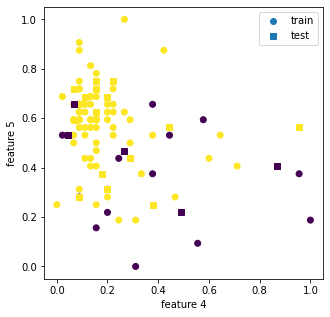

In [ ]:
x, y = data_h[:,:-1], data_h[:,-1].astype(int)

# data normalization
x = (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))

(N,D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \nfeatures (D) \t {D} \nclasses (C) \t {C}')

np.random.seed(1234)
inds = np.random.permutation(N)

#split the dataset into train and test (4:1)
n_test = N // 5

x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_train, y_train = x[inds[n_test:]], y[inds[n_test:]]

#visualization of the data
plt.scatter(x_train[:,3], x_train[:,4], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,3], x_test[:,4], c=y_test, marker='s', label='test')
plt.legend()
plt.xlabel('feature 4')
plt.ylabel('feature 5')
plt.gcf().set_size_inches(5, 5)
#plt.savefig('data_visualization_h.pdf', format='pdf', bbox_inches='tight')
#files.download('data_visualization_h.pdf')
plt.show()

We can perform some initial tests on the dataset.

In [ ]:
model = KNN(K=5, dist_fn= euclidean)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'Accuracy is {accuracy*100:.1f}%.')

Accuracy is 77.3%.


In [ ]:
tree = DecisionTree(max_depth=15, cost_fn=cost_misclassification)

y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'Accuracy is {accuracy*100:.1f}%.')

Accuracy is 63.6%.


### Selecting the best model (cross validation)

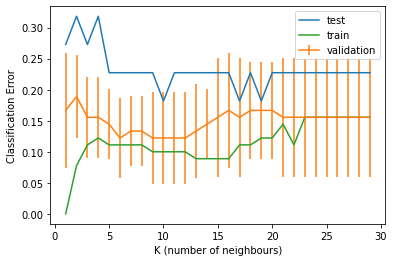

In [ ]:
#split the dataset into train, validation, and test sets (4:1)
n_rest = N - n_test

x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]

K_list = range(1,30)
num_folds = 5
err_test, err_valid = np.zeros(len(K_list)), np.zeros((len(K_list), num_folds))
err_train = np.zeros(len(K_list))

for i, K in enumerate(K_list):
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        model = KNN(K=K, dist_fn= euclidean)
        y_prob_rest, _ = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred_rest = np.argmax(y_prob_rest,axis=-1)
        err_valid[i, f] = evaluate_loss(y_rest[val], y_pred_rest)

    model = KNN(K=K, dist_fn= euclidean)
    y_prob_test, _ = model.fit(x_rest, y_rest).predict(x_test)
    y_pred_test = np.argmax(y_prob_test,axis=-1)
    err_test[i] = evaluate_loss(y_test, y_pred_test)
    y_prob_train, _ = model.fit(x_rest, y_rest).predict(x_rest)
    y_pred_train = np.argmax(y_prob_train,axis=-1)
    err_train[i] = evaluate_loss(y_rest, y_pred_train)

plt.plot(K_list, err_test,  label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.plot(K_list, err_train,  label='train')
plt.legend(loc='upper right')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Classification Error')
#plt.savefig('KNN_error_h.pdf', format='pdf', bbox_inches='tight')
#files.download('KNN_error_h.pdf')
plt.show()

Regarding the classification error vs K, i.e. the number of nearest neighbours, the model with K=10 leads to the lowest validation and test errors. The same validation error is also produced with K=13. We may select K=13 as the best model since it is simpler compared with K=10.

In [ ]:
model = KNN(K=10, dist_fn= euclidean)

y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'Accuracy is {accuracy*100:.1f}%.')

Accuracy is 81.8%.


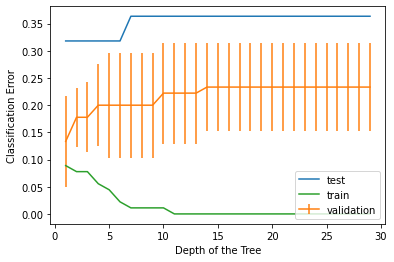

In [ ]:
#split the dataset into train, validation, and test sets (4:1)
n_rest = N - n_test

x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]

Max_Depth = range(1,30)
num_folds = 5
err_test, err_valid = np.zeros(len(Max_Depth)), np.zeros((len(Max_Depth), num_folds))
err_train = np.zeros(len(Max_Depth))

for i, MD in enumerate(Max_Depth):
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        model = DecisionTree(max_depth=MD, cost_fn=cost_misclassification)
        y_prob_rest = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred_rest = np.argmax(y_prob_rest,axis=-1)
        err_valid[i, f] = evaluate_loss(y_rest[val], y_pred_rest)

    model = DecisionTree(max_depth=MD, cost_fn=cost_misclassification)
    y_prob_test = model.fit(x_rest, y_rest).predict(x_test)
    y_pred_test = np.argmax(y_prob_test,axis=-1)
    err_test[i]= evaluate_loss(y_test, y_pred_test)
    y_prob_train = model.fit(x_rest, y_rest).predict(x_rest)
    y_pred_train = np.argmax(y_prob_train,axis=-1)
    err_train[i] = evaluate_loss(y_rest, y_pred_train)

plt.plot(K_list, err_test,  label='test')
plt.errorbar(Max_Depth, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.plot(K_list, err_train,  label='train')
plt.legend(loc='lower right')
plt.xlabel('Depth of the Tree')
plt.ylabel('Classification Error')
#plt.savefig('DT_error_h.pdf', format='pdf', bbox_inches='tight')
#files.download('DT_error_h.pdf')
plt.show()

In [ ]:
tree = DecisionTree(max_depth=3, cost_fn=cost_misclassification)

y_prob = tree.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'accuracy is {accuracy*100:.1f}%.')

accuracy is 68.2%.


### Different distnace and cost functions

We study the effect of different distance or cost functions on the performance of both models.

In [ ]:
knn_h_distance = np.zeros([4])

# manhattan
model = KNN(K=10, dist_fn= manhattan)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_h_distance[0] = evaluate_acc(y_test, y_pred)

# euclidean
model = KNN(K=10, dist_fn= euclidean)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_h_distance[1] = evaluate_acc(y_test, y_pred)

# minkowski3
model = KNN(K=10, dist_fn= minkowski3)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_h_distance[2] = evaluate_acc(y_test, y_pred)

# cosine
model = KNN(K=10, dist_fn= cosine)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_h_distance[3] = evaluate_acc(y_test, y_pred)

print('Accuracy of KNN for different distance functions:')
print(f'Manhattan: \t{knn_h_distance[0]*100:.1f}%')
print(f'Euclidean: \t{knn_h_distance[1]*100:.1f}%')
print(f'Minkowski3: \t{knn_h_distance[2]*100:.1f}%')
print(f'Cosine: \t{knn_h_distance[3]*100:.1f}%')

dt_h_cost = np.zeros([3])

# misclassification
tree = DecisionTree(max_depth=3, cost_fn=cost_misclassification)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_h_cost[0] = evaluate_acc(y_test, y_pred)

# entropy
tree = DecisionTree(max_depth=3, cost_fn=cost_entropy)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_h_cost[1] = evaluate_acc(y_test, y_pred)

# gini index
tree = DecisionTree(max_depth=3, cost_fn=cost_gini_index)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_h_cost[2] = evaluate_acc(y_test, y_pred)

print('\nAccuracy of DT for different cost functions:')
print(f'Misclassification: \t{dt_h_cost[0]*100:.1f}%')
print(f'Entropy: \t\t{dt_h_cost[1]*100:.1f}%')
print(f'Gini Index: \t\t{dt_h_cost[2]*100:.1f}%')

Accuracy of KNN for different distance functions:
Manhattan: 	77.3%
Euclidean: 	81.8%
Minkowski3: 	77.3%
Cosine: 	77.3%

Accuracy of DT for different cost functions:
Misclassification: 	68.2%
Entropy: 		68.2%
Gini Index: 		63.6%


### Decision Boundaries

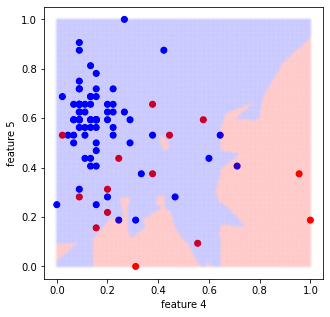

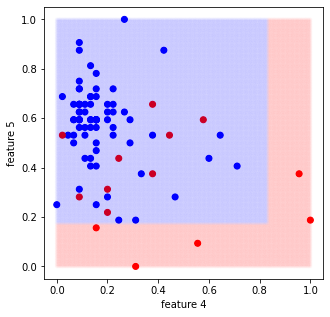

In [ ]:
# specifying two features to plot decision boundaries
f1 = 3;
f2 = 4;

x0v = np.linspace(np.min(x[:,f1]), np.max(x[:,f1]), 200)
x1v = np.linspace(np.min(x[:,f2]), np.max(x[:,f2]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = KNN(K=10, dist_fn= euclidean)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob_all, _ = model.fit(x_train[:,[f1,f2]], y_train).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

# since the number of classes are 2, we add 1 to comply with the RGB format
# for visualizing classes with red and blue colors

y_train_prob = np.insert(y_train_prob, 1, np.zeros(y_train.shape[0]), axis=-1)
y_pred_all = np.insert(y_pred_all, 1, np.zeros(y_prob_all.shape[0]), axis=-1)

plt.scatter(x_train[:,f1], x_train[:,f2], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.02)
plt.xlabel('feature 4')
plt.ylabel('feature 5')
plt.gcf().set_size_inches(5, 5)
#plt.savefig('KNN_DB_h.pdf', format='pdf', bbox_inches='tight')
#files.download('KNN_DB_h.pdf')
plt.show()

model = DecisionTree(max_depth=3, cost_fn=cost_misclassification)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob_all = model.fit(x_train[:,[f1,f2]], y_train).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

# since the number of classes are 2, we add 1 to comply with the RGB format
# for visualizing classes with red and blue colors

y_train_prob = np.insert(y_train_prob, 1, np.zeros(y_train.shape[0]), axis=-1)
y_pred_all = np.insert(y_pred_all, 1, np.zeros(y_prob_all.shape[0]), axis=-1)

plt.scatter(x_train[:,f1], x_train[:,f2], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.02)
plt.xlabel('feature 4')
plt.ylabel('feature 5')
plt.gcf().set_size_inches(5, 5)
#plt.savefig('DT_DB_h.pdf', format='pdf', bbox_inches='tight')
#files.download('DT_DB_h.pdf')
plt.show()

### Confusion Matrix

In [ ]:
model = KNN(K=10, dist_fn= euclidean)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)

cmat = confusion_matrix(y_test, y_pred)
print(cmat, '\n')
print(f'KNN Accuracy: {np.sum(np.diag(cmat))/np.sum(cmat):0.2f}')
print(f'KNN Precision: {cmat[1, 1]/np.sum(cmat, axis=1)[1]:0.2f}')
print(f'KNN Recall: {cmat[1, 1]/np.sum(cmat, axis=0)[1]:0.2f}')
print(f'KNN Fallout: {cmat[1, 0]/np.sum(cmat, axis=0)[0]:0.2f}')
print(f'KNN Selectivity: {cmat[0, 0]/np.sum(cmat, axis=0)[0]:0.2f}')

[[ 2.  3.]
 [ 1. 16.]] 

KNN Accuracy: 0.82
KNN Precision: 0.94
KNN Recall: 0.84
KNN Fallout: 0.33
KNN Selectivity: 0.67


In [ ]:
tree = DecisionTree(max_depth=3, cost_fn=cost_misclassification)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_h_cost[0] = evaluate_acc(y_test, y_pred)

cmat = confusion_matrix(y_test, y_pred)
print(cmat,'\n')
print(f'DT Accuracy: {np.sum(np.diag(cmat))/np.sum(cmat):0.2f}')
print(f'DT Precision: {cmat[1, 1]/np.sum(cmat, axis=1)[1]:0.2f}')
print(f'DT Recall: {cmat[1, 1]/np.sum(cmat, axis=0)[1]:0.2f}')
print(f'DT Fallout: {cmat[1, 0]/np.sum(cmat, axis=0)[0]:0.2f}')
print(f'DT Selectivity: {cmat[0, 0]/np.sum(cmat, axis=0)[0]:0.2f}')

[[ 1.  4.]
 [ 3. 14.]] 

DT Accuracy: 0.68
DT Precision: 0.82
DT Recall: 0.78
DT Fallout: 0.75
DT Selectivity: 0.25


## 2- Diabetic Retinopathy Debrecen dataset

We split the dataset into training and test sets with a ratio of 9:1 and, later, in order to select the best model, we use a 10 fold cross validation.

### Data visualiztion

instances (N) 	 1151 
features (D) 	 3 
classes (C) 	 2


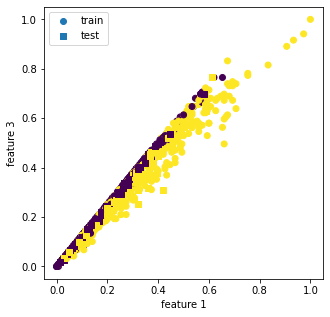

In [ ]:
x, y = data_d[:,:-1], data_d[:,-1].astype(int)

# data normalization
x = (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))

(N,D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \nfeatures (D) \t {D} \nclasses (C) \t {C}')

np.random.seed(1234)
inds = np.random.permutation(N)

#split the dataset into train and test (9:1)
n_test = N // 10

x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_train, y_train = x[inds[n_test:]], y[inds[n_test:]]

#visualization of the data
plt.scatter(x_train[:,0], x_train[:,2], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,2], c=y_test, marker='s', label='test')
plt.legend()
plt.xlabel('feature 1')
plt.ylabel('feature 3')
plt.gcf().set_size_inches(5, 5)
#plt.savefig('data_visualization_d.pdf', format='pdf', bbox_inches='tight')
#files.download('data_visualization_d.pdf')
plt.show()

We can perform some initial tests on the dataset.

In [ ]:
model = KNN(K=5, dist_fn= euclidean)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'Accuracy is {accuracy*100:.1f}%.')

Accuracy is 73.9%.


In [ ]:
tree = DecisionTree(max_depth=15, cost_fn=cost_misclassification)

y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'accuracy is {accuracy*100:.1f}%.')

accuracy is 61.7%.


### Selecting the best model (cross validation)

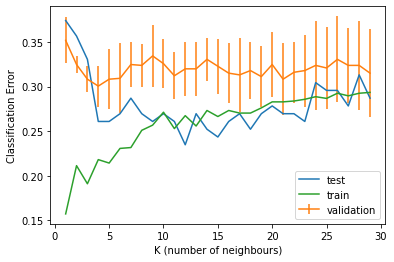

In [ ]:
#split the dataset into train, validation, and test sets (9:1)
n_rest = N - n_test

x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]

K_list = range(1,30)
num_folds = 5
err_test, err_valid = np.zeros(len(K_list)), np.zeros((len(K_list), num_folds))
err_train = np.zeros(len(K_list))

for i, K in enumerate(K_list):
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        model = KNN(K=K, dist_fn= euclidean)
        y_prob_rest, _ = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred_rest = np.argmax(y_prob_rest,axis=-1)
        err_valid[i, f] = evaluate_loss(y_rest[val], y_pred_rest)

    model = KNN(K=K, dist_fn= euclidean)
    y_prob_test, _ = model.fit(x_rest, y_rest).predict(x_test)
    y_pred_test = np.argmax(y_prob_test,axis=-1)
    err_test[i] = evaluate_loss(y_test, y_pred_test)
    y_prob_train, _ = model.fit(x_rest, y_rest).predict(x_rest)
    y_pred_train = np.argmax(y_prob_train,axis=-1)
    err_train[i] = evaluate_loss(y_rest, y_pred_train)

plt.plot(K_list, err_test,  label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.plot(K_list, err_train,  label='train')
plt.legend(loc='lower right')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Classification Error')
#plt.savefig('KNN_error_d.pdf', format='pdf', bbox_inches='tight')
#files.download('KNN_error_d.pdf')
plt.show()

Now with K=12, we retrain the model with the entire 90% of the data and report its accuracy on the test data.

In [ ]:
model = KNN(K=12, dist_fn= euclidean)

y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'Accuracy is {accuracy*100:.1f}%.')

Accuracy is 76.5%.


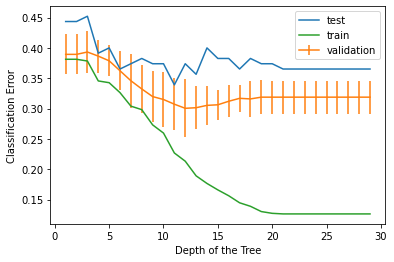

In [ ]:
#split the dataset into train, validation, and test sets (9:1)
n_rest = N - n_test

x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]

Max_Depth = range(1,30)
num_folds = 5
err_test, err_valid = np.zeros(len(Max_Depth)), np.zeros((len(Max_Depth), num_folds))
err_train = np.zeros(len(Max_Depth))

for i, MD in enumerate(Max_Depth):
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        model = DecisionTree(max_depth=MD, cost_fn=cost_misclassification)
        y_prob_rest = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred_rest = np.argmax(y_prob_rest,axis=-1)
        err_valid[i, f] = evaluate_loss(y_rest[val], y_pred_rest)

    model = DecisionTree(max_depth=MD, cost_fn=cost_misclassification)
    y_prob_test = model.fit(x_rest, y_rest).predict(x_test)
    y_pred_test = np.argmax(y_prob_test,axis=-1)
    err_test[i]= evaluate_loss(y_test, y_pred_test)
    y_prob_train = model.fit(x_rest, y_rest).predict(x_rest)
    y_pred_train = np.argmax(y_prob_train,axis=-1)
    err_train[i] = evaluate_loss(y_rest, y_pred_train)

plt.plot(K_list, err_test,  label='test')
plt.errorbar(Max_Depth, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.plot(K_list, err_train,  label='train')
plt.legend()
plt.xlabel('Depth of the Tree')
plt.ylabel('Classification Error')
#plt.savefig('DT_error_d.pdf', format='pdf', bbox_inches='tight')
#files.download('DT_error_d.pdf')
plt.show()

Now with a max depth of 11, we retrain the model with the entire 90% of the data and report its accuracy on the test data.

In [ ]:
tree = DecisionTree(max_depth=11, cost_fn=cost_misclassification)

y_prob = tree.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,1)
accuracy = evaluate_acc(y_test, y_pred)

print(f'accuracy is {accuracy*100:.1f}%.')

accuracy is 66.1%.


### Different distnace and cost functions

We study the effect of different distance or cost functions on the performance of both models.

In [ ]:
knn_d_distance = np.zeros([4])

# manhattan
model = KNN(K=12, dist_fn= manhattan)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_d_distance[0] = evaluate_acc(y_test, y_pred)

# euclidean
model = KNN(K=12, dist_fn= euclidean)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_d_distance[1] = evaluate_acc(y_test, y_pred)

# minkowski3
model = KNN(K=12, dist_fn= minkowski3)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_d_distance[2] = evaluate_acc(y_test, y_pred)

# cosine
model = KNN(K=12, dist_fn= cosine)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
knn_d_distance[3] = evaluate_acc(y_test, y_pred)

print('Accuracy of KNN for different distance functions:')
print(f'Manhattan: \t{knn_d_distance[0]*100:.1f}%')
print(f'Euclidean: \t{knn_d_distance[1]*100:.1f}%')
print(f'Minkowski3: \t{knn_d_distance[2]*100:.1f}%')
print(f'Cosine: \t{knn_d_distance[3]*100:.1f}%')

dt_d_cost = np.zeros([3])

# misclassification
tree = DecisionTree(max_depth=11, cost_fn=cost_misclassification)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_d_cost[0] = evaluate_acc(y_test, y_pred)

# entropy
tree = DecisionTree(max_depth=11, cost_fn=cost_entropy)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_d_cost[1] = evaluate_acc(y_test, y_pred)

# gini index
tree = DecisionTree(max_depth=11, cost_fn=cost_gini_index)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_d_cost[2] = evaluate_acc(y_test, y_pred)

print('\nAccuracy of DT for different cost functions:')
print(f'Misclassification: \t{dt_d_cost[0]*100:.1f}%')
print(f'Entropy: \t\t{dt_d_cost[1]*100:.1f}%')
print(f'Gini Index: \t\t{dt_d_cost[2]*100:.1f}%')

Accuracy of KNN for different distance functions:
Manhattan: 	75.7%
Euclidean: 	76.5%
Minkowski3: 	73.9%
Cosine: 	70.4%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  



Accuracy of DT for different cost functions:
Misclassification: 	66.1%
Entropy: 		68.7%
Gini Index: 		65.2%


### Decision Boundaries

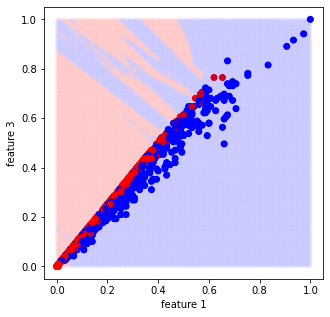

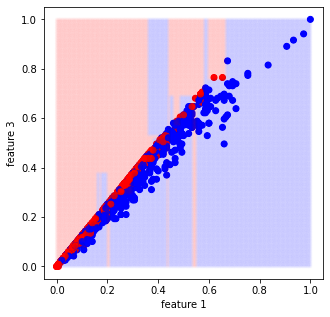

In [ ]:
# specifying two features to plot decision boundaries
f1 = 0;
f2 = 2;

x0v = np.linspace(np.min(x[:,f1]), np.max(x[:,f1]), 200)
x1v = np.linspace(np.min(x[:,f2]), np.max(x[:,f2]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = KNN(K=12, dist_fn= euclidean)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob_all, _ = model.fit(x_train[:,[f1,f2]], y_train).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

# since the number of classes are 2, we add 1 to comply with the RGB format
# for visualizing classes with red and blue colors

y_train_prob = np.insert(y_train_prob, 1, np.zeros(y_train.shape[0]), axis=-1)
y_pred_all = np.insert(y_pred_all, 1, np.zeros(y_prob_all.shape[0]), axis=-1)

plt.scatter(x_train[:,f1], x_train[:,f2], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.02)
plt.xlabel('feature 1')
plt.ylabel('feature 3')
plt.gcf().set_size_inches(5, 5)
#plt.savefig('KNN_DB_d.pdf', format='pdf', bbox_inches='tight')
#files.download('KNN_DB_d.pdf')
plt.show()

model = DecisionTree(max_depth=11, cost_fn=cost_misclassification)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob_all = model.fit(x_train[:,[f1,f2]], y_train).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

# since the number of classes are 2, we add 1 to comply with the RGB format
# for visualizing classes with red and blue colors

y_train_prob = np.insert(y_train_prob, 1, np.zeros(y_train.shape[0]), axis=-1)
y_pred_all = np.insert(y_pred_all, 1, np.zeros(y_prob_all.shape[0]), axis=-1)

plt.scatter(x_train[:,f1], x_train[:,f2], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.02)
plt.xlabel('feature 1')
plt.ylabel('feature 3')
plt.gcf().set_size_inches(5, 5)
#plt.savefig('DT_DB_d.pdf', format='pdf', bbox_inches='tight')
#files.download('DT_DB_d.pdf')
plt.show()

### Confusion Matrix

In [ ]:
model = KNN(K=12, dist_fn= euclidean)
y_prob, _ = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)

cmat = confusion_matrix(y_test, y_pred)
print(cmat, '\n')
print(f'KNN Accuracy: {np.sum(np.diag(cmat))/np.sum(cmat):0.2f}')
print(f'KNN Precision: {cmat[1, 1]/np.sum(cmat, axis=1)[1]:0.2f}')
print(f'KNN Recall: {cmat[1, 1]/np.sum(cmat, axis=0)[1]:0.2f}')
print(f'KNN Fallout: {cmat[1, 0]/np.sum(cmat, axis=0)[0]:0.2f}')
print(f'KNN Selectivity: {cmat[0, 0]/np.sum(cmat, axis=0)[0]:0.2f}')

[[50.  8.]
 [19. 38.]] 

KNN Accuracy: 0.77
KNN Precision: 0.67
KNN Recall: 0.83
KNN Fallout: 0.28
KNN Selectivity: 0.72


In [ ]:
tree = DecisionTree(max_depth=11, cost_fn=cost_misclassification)
y_prob = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
dt_h_cost[0] = evaluate_acc(y_test, y_pred)

cmat = confusion_matrix(y_test, y_pred)
print(cmat,'\n')
print(f'DT Accuracy: {np.sum(np.diag(cmat))/np.sum(cmat):0.2f}')
print(f'DT Precision: {cmat[1, 1]/np.sum(cmat, axis=1)[1]:0.2f}')
print(f'DT Recall: {cmat[1, 1]/np.sum(cmat, axis=0)[1]:0.2f}')
print(f'DT Fallout: {cmat[1, 0]/np.sum(cmat, axis=0)[0]:0.2f}')
print(f'DT Selectivity: {cmat[0, 0]/np.sum(cmat, axis=0)[0]:0.2f}')

[[39. 19.]
 [20. 37.]] 

DT Accuracy: 0.66
DT Precision: 0.65
DT Recall: 0.66
DT Fallout: 0.34
DT Selectivity: 0.66


## Comparison of different distance/cost functions

In this section, we compare the results for performance evaluation with different distance/cost functions.

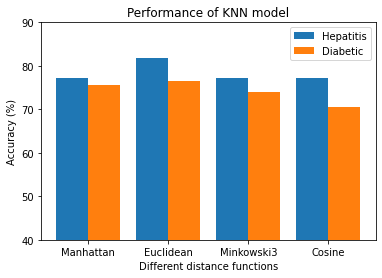

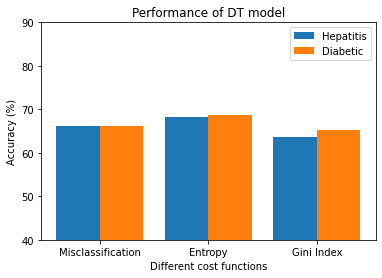

In [ ]:
distance = ['Manhattan', 'Euclidean', 'Minkowski3', 'Cosine']

x_axis = np.arange(len(distance))

width = 0.4
plt.bar(x_axis - width/2, knn_h_distance*100, width, label='Hepatitis')
plt.bar(x_axis + width/2, knn_d_distance*100, width, label='Diabetic')
plt.xticks(x_axis, distance)
plt.xlabel('Different distance functions')
plt.ylabel('Accuracy (%)')
plt.ylim([40, 90])
plt.legend(loc='upper right')
plt.title('Performance of KNN model')
#plt.savefig('KNN_distance.pdf', format='pdf', bbox_inches='tight')
#files.download('KNN_distance.pdf')
plt.show()

cost = ['Misclassification', 'Entropy', 'Gini Index']

x_axis = np.arange(len(cost))

width = 0.4
plt.bar(x_axis - width/2, dt_h_cost*100, width, label='Hepatitis')
plt.bar(x_axis + width/2, dt_d_cost*100, width, label='Diabetic')
plt.xticks(x_axis, cost)
plt.xlabel('Different cost functions')
plt.ylabel('Accuracy (%)')
plt.ylim([40, 90])
plt.legend(loc='upper right')
plt.title('Performance of DT model')
#plt.savefig('DT_cost.pdf', format='pdf', bbox_inches='tight')
#files.download('DT_cost.pdf')
plt.show()